## Model improvements
- feature engineering: adding more features to the dataset
    - add age*2
    - smoker and bmi 
- polynomialFeature
- using crossvalidation on spliting training data
- using randomizedsearchcv (Random forest)
- use pipeline for smototh process

In [48]:
import pandas as pd

df = pd.read_csv('The Titanic dataset.csv')

#lets remove the first col and make the second col as index
df.columns = df.iloc[0]
df = df.drop(0)
#fill the column with nan value with "name"
df = df.rename(columns = {df.columns[3]: 'Name'})


df = df.reset_index(drop = True)
#drop the sn column
df = df.drop('sn', axis = 1)
df

,pclass,survived,Name,gender,age,family,fare,embarked,date
0,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
2,3,0,Master. Eugene Joseph,male,?,2,20.25,S,02-Jan-90
3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2,**,S,03-Jan-90
4,3,1,"Abbott, Mr. Rossmore Edward",female,35,2,20.25,S,04-Jan-90
...,...,...,...,...,...,...,...,...,...
1296,2,0,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24,0,13,S,19-Jul-93
1297,3,0,"Zabour, Miss. Hileni",female,14.5,1,14.4542,C,20-Jul-93
1298,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,7.225,C,21-Jul-93
1299,3,0,"Zakarian, Mr. Ortin",male,27,0,7.225,C,22-Jul-93


In [49]:
#some of the missing values are not in the null format eg ? in age and ** in fare lets handle that
df = df.replace('?', pd.NA)
df = df.replace('**', pd.NA)

In [50]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pclass    1301 non-null   object
 1   survived  1301 non-null   object
 2   Name      1301 non-null   object
 3   gender    1300 non-null   object
 4   age       1043 non-null   object
 5   family    1299 non-null   object
 6   fare      1298 non-null   object
 7   embarked  1295 non-null   object
 8   date      1301 non-null   object
dtypes: object(9)
memory usage: 91.6+ KB


0
pclass        0
survived      0
Name          0
gender        1
age         258
family        2
fare          3
embarked      6
date          0
dtype: int64

In [51]:
# Convert columns to correct dtypes
df['pclass'] = df['pclass'].astype('category')
df['gender'] = df['gender'].astype('category')
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['family'] = pd.to_numeric(df['family'], errors='coerce').astype('Int64')
df['fare'] = pd.to_numeric(df['fare'], errors='coerce').astype('float64')
df['embarked'] = df['embarked'].astype('category')

# Fill missing 'age' values by group median, then overall median
df['age'] = df['age'].fillna(df.groupby(['pclass', 'gender'])['age'].transform('median'))
df['age'] = df['age'].fillna(df['age'].median())
#round the age values to the nearest integer
df['age'] = df['age'].round().astype('Int64')
#fill the missing value in gender
df['gender'] = df['gender'].fillna('male')
#fill missing na in family with 0
df['family'] = df['family'].fillna(0)
#fill the missing value in fare with the median fare
df['fare'] = df['fare'].fillna(df['fare'].median())
#fill the missing value in embarked with the mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['survived'] = df['survived'].astype('category')

#convert date col to datetime
df['date'] = pd.to_datetime(df['date'])
df.isnull().sum()

C:\Users\Amina\AppData\Local\Temp\ipykernel_11500\3257292922.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['age'] = df['age'].fillna(df.groupby(['pclass', 'gender'])['age'].transform('median'))
C:\Users\Amina\AppData\Local\Temp\ipykernel_11500\3257292922.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


0
pclass      0
survived    0
Name        0
gender      0
age         0
family      0
fare        0
embarked    0
date        0
dtype: int64

In [52]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   pclass    1301 non-null   category      
 1   survived  1301 non-null   category      
 2   Name      1301 non-null   object        
 3   gender    1301 non-null   category      
 4   age       1301 non-null   Int64         
 5   family    1301 non-null   Int64         
 6   fare      1301 non-null   float64       
 7   embarked  1301 non-null   category      
 8   date      1301 non-null   datetime64[ns]
dtypes: Int64(2), category(4), datetime64[ns](1), float64(1), object(1)
memory usage: 59.1+ KB


,pclass,survived,Name,gender,age,family,fare,embarked,date
0,3,0,Mr. Anthony,male,42,0,7.5500,S,1990-01-01
1,3,0,Mr. Anthony,male,42,0,7.5500,S,1990-01-01
2,3,0,Master. Eugene Joseph,male,25,2,20.2500,S,1990-01-02
3,2,0,"Abbott, Mr. Rossmore Edward",male,26,2,14.4542,S,1990-01-03
4,3,1,"Abbott, Mr. Rossmore Edward",female,35,2,20.2500,S,1990-01-04
...,...,...,...,...,...,...,...,...,...
1296,2,0,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24,0,13.0000,S,1993-07-19
1297,3,0,"Zabour, Miss. Hileni",female,14,1,14.4542,C,1993-07-20
1298,3,0,"Zakarian, Mr. Mapriededer",male,26,0,7.2250,C,1993-07-21
1299,3,0,"Zakarian, Mr. Ortin",male,27,0,7.2250,C,1993-07-22


# visualize Relationships and data

Text(0.5, 1.0, 'Age Distribution of Titanic Passengers')

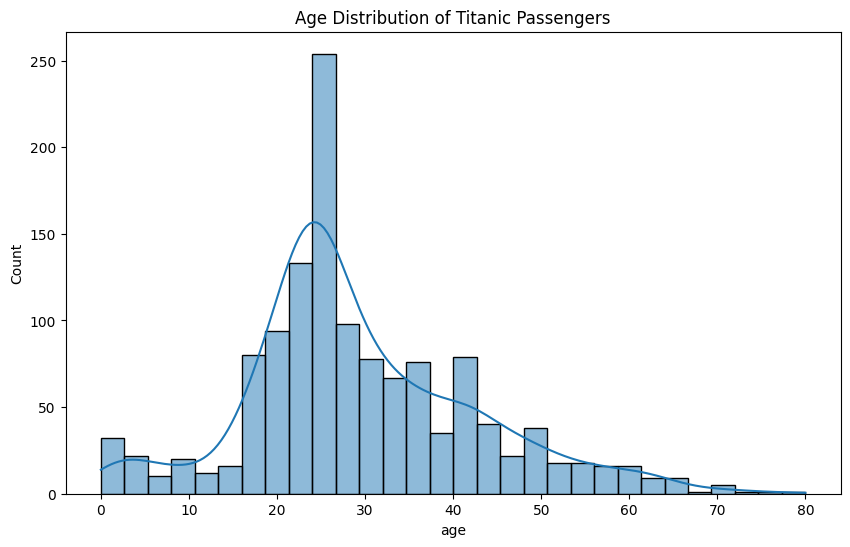

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

#Distribution of age 
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, ax=ax)
ax.set_title('Age Distribution of Titanic Passengers')


<Axes: xlabel='gender', ylabel='count'>

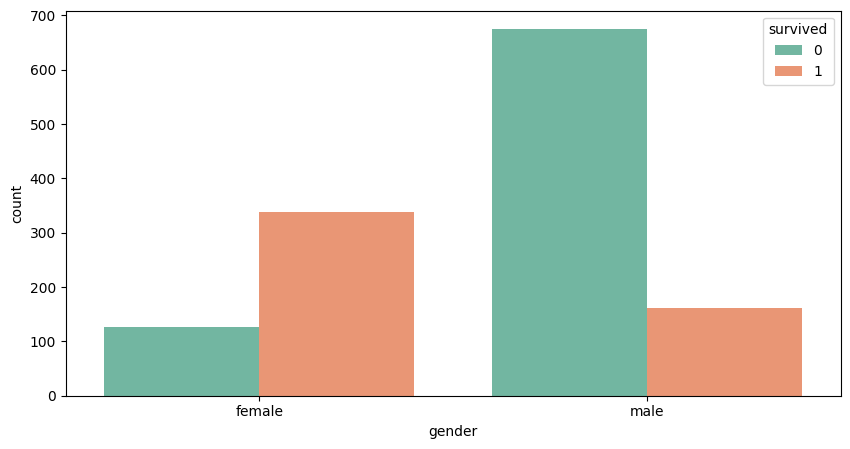

In [54]:
#check the count of male and female by survival

fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(x='gender', hue='survived', data=df, ax=ax, palette='Set2')

frmale has a higher survival rate than male. that means men died than female

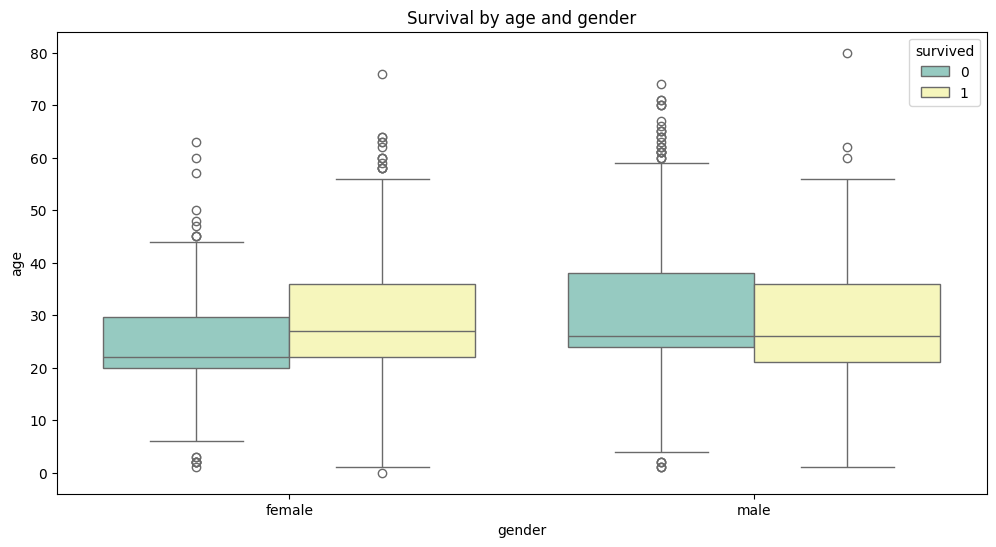

In [55]:
#visualize the relationship between age, gender and survival
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x = 'gender', y = 'age', hue = 'survived', data = df, ax=ax, palette='Set3')
ax.set_title('Survival by age and gender')
plt.show()

- Survisors tends to be younger than non survivors
- median of female death age is like 21 and interquartile range is between 20 and 29 
- median of female survived age is like 26 and interquartile range is between 21 and 35 (wider interquatile range)
- present of outliers passengers were mush younger or older than majority
- gender and age both influenced the survival chance

In [56]:
df['family'].unique()

<IntegerArray>
[0, 2, 1, 3, 6, 4, 5, 7, 10]
Length: 9, dtype: Int64

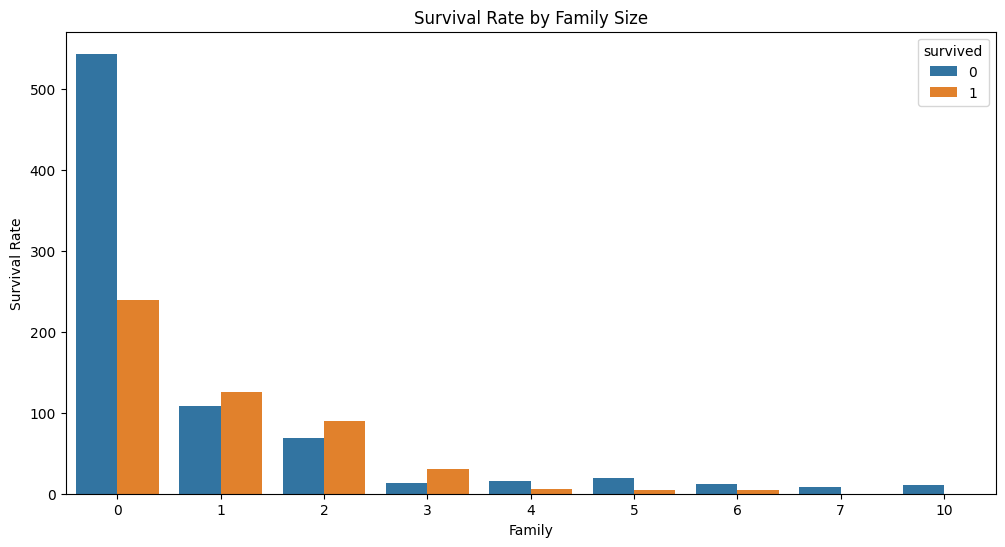

In [57]:
# check family size and survival

fid, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x = 'family', hue = 'survived', data = df, ax = ax)
ax.set_title('Survival Rate by Family Size')
ax.set_xlabel('Family')
ax.set_ylabel('Survival Rate')
plt.show()

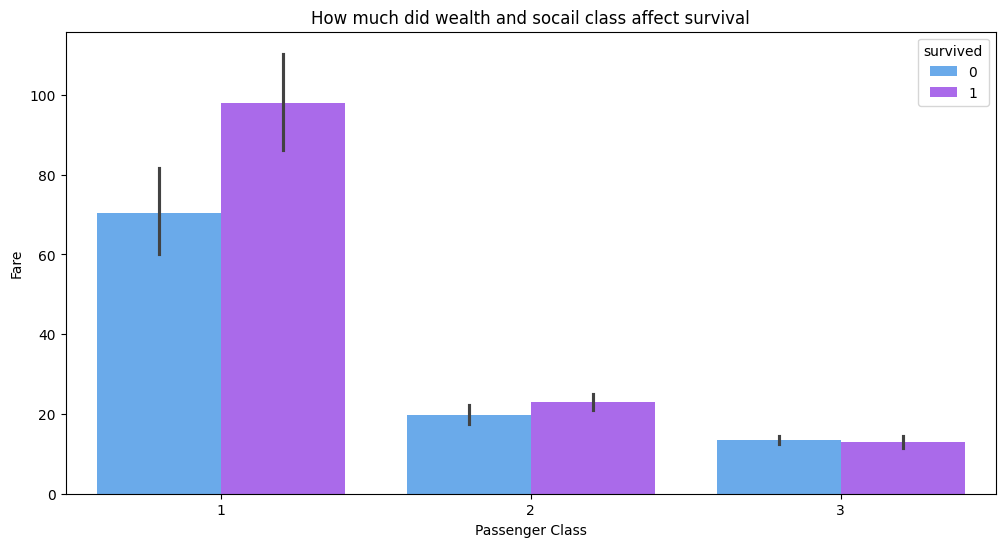

In [58]:
# how much did wealth and socail class affect surviva (pclass and fare)

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x = 'pclass', y = 'fare', hue = 'survived', data = df, ax = ax, palette= 'cool')
ax.set_title('How much did wealth and socail class affect survival')
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Fare')
plt.show()


- its observed that the higher the fair the higher the rate of survival 
- those in firsclass has a higher fair 

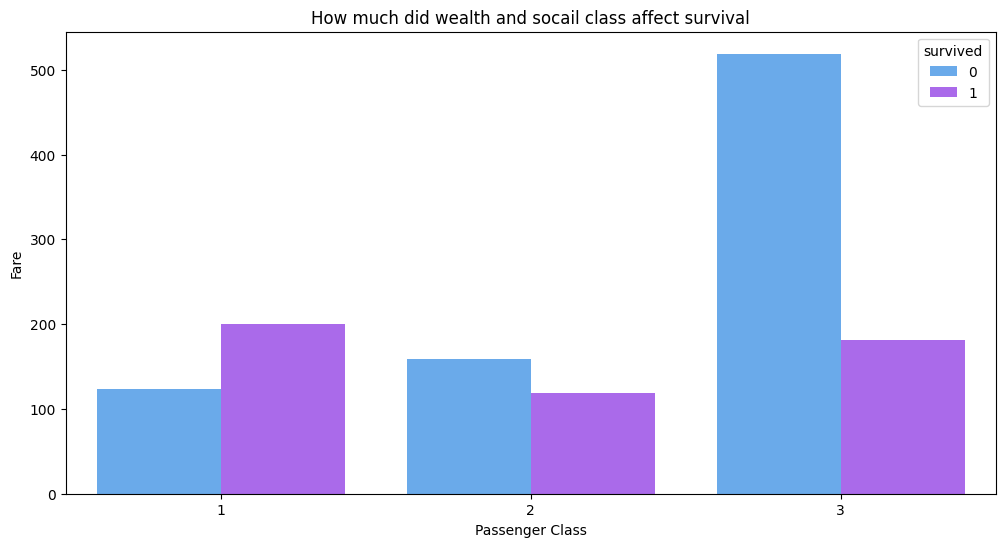

In [59]:
#counts of survial based on class
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x = 'pclass', hue = 'survived', data = df, ax = ax, palette= 'cool')
ax.set_title('How much did wealth and socail class affect survival')
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Fare')
plt.show()

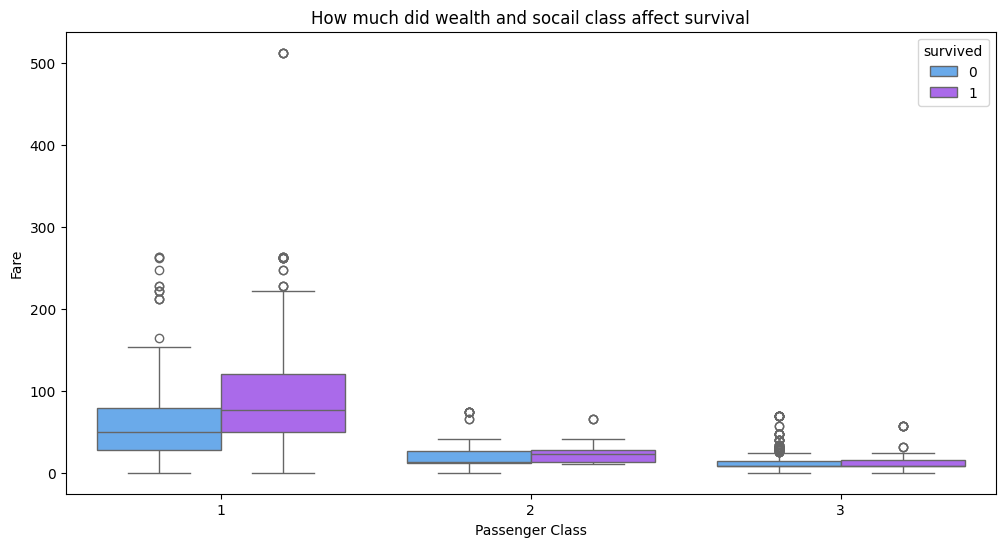

In [60]:
# how much did wealth and socail class affect surviva (pclass and fare)
#using boxplot for more insight
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x = 'pclass', y = 'fare', hue = 'survived', data = df, ax = ax, palette= 'cool')
ax.set_title('How much did wealth and socail class affect survival')
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Fare')
plt.show()

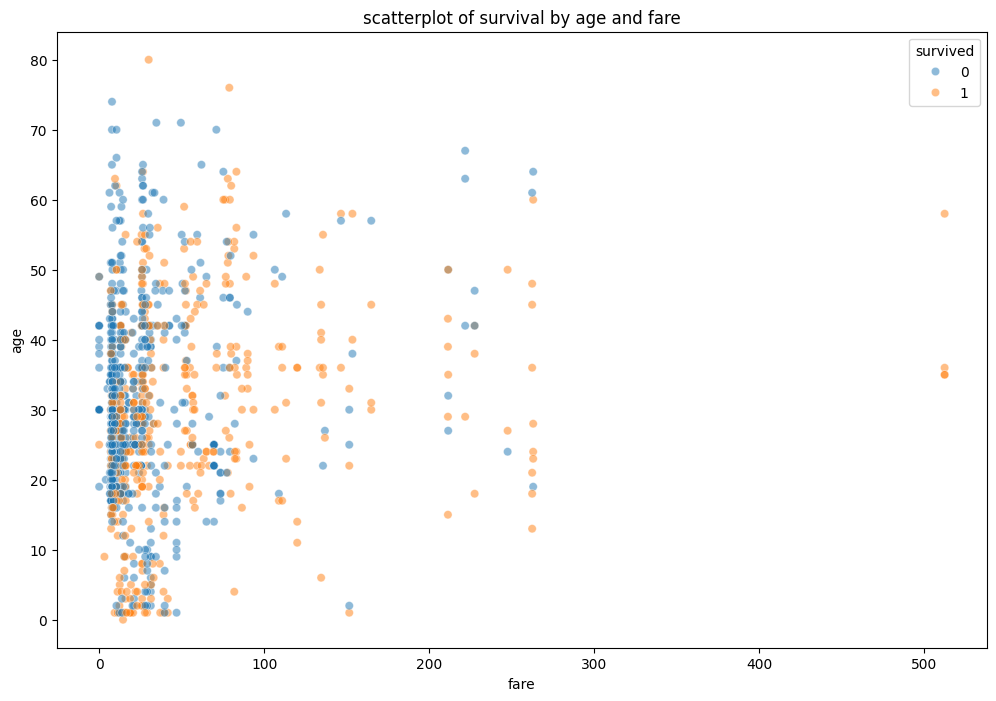

In [61]:
#scatterplot for fair and age with hue as survival
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'fare', y = 'age', hue = 'survived', data = df, alpha = 0.5)
plt.title('scatterplot of survival by age and fare')
plt.xlabel('fare')
plt.ylabel('age')
plt.show()

Text(0.5, 0, 'passenger class')

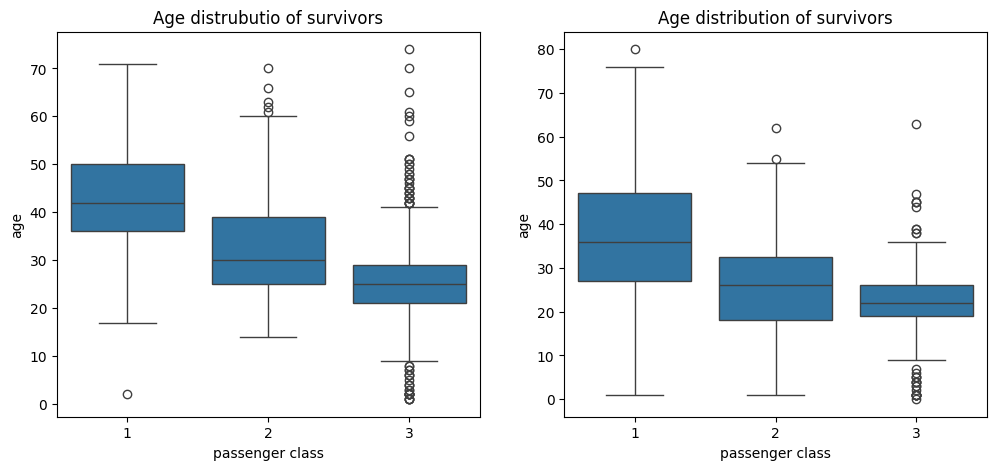

In [62]:
fig, ax = plt.subplots(ncols=2, figsize = (12,5))
sns.boxplot(x = 'pclass', y = 'age', data = df[df['survived'] == '0'], ax = ax[0])
ax[0].set_title('Age distrubutio of survivors')
ax[0].set_xlabel('passenger class')

sns.boxplot(x = 'pclass', y = 'age', data = df[df['survived'] == '1'], ax = ax[1])
ax[1].set_title('Age distribution of survivors')
ax[1].set_xlabel('passenger class')


# Model Training 

- select X and y features
- encode categorical var using label encoder or onehotencoder
- split the data
- create a pipeline and use cross validation with logistic regression
- check the evaluation metrix
- now use the training and test set to train the model
- compare the evaluation meteix
- plot confusion metrics
- Train a Decision tree 
- train random forest 
## Model Improvemnt
- Feature engineering
  - add some features 
- find the best params using randomizedsearchcv
- perform error analysis

In [63]:
df.columns

Index(['pclass', 'survived', 'Name', 'gender', 'age', 'family', 'fare',
       'embarked', 'date'],
      dtype='object', name=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score, f1_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


 
categorical_var = ['pclass', 'gender', 'embarked']

#use onehotencoding to convert categorical var
preprocessor = ColumnTransformer(transformers= [('cat', OneHotEncoder(handle_unknown='ignore'), categorical_var)],
                                  remainder='passthrough')

#use label encoder to convert survival column
le = LabelEncoder()
df['survived_le'] = le.fit_transform(df['survived'].astype(str))
# select x and y features
X = df.drop(['survived', 'Name', 'survived_le', 'date'],  axis= 1)
y = df['survived_le']

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc  = preprocessor.transform(X_test)
# y_train = preprocessor.fit_transform(y_train)

logreg = LogisticRegression()
logreg.fit(X_train_enc, y_train)
y_pred = logreg.predict(X_test_enc)

print(classification_report(y_test, y_pred))


c:\Users\Amina\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.83      0.85      0.84       233
           1       0.76      0.74      0.75       158

    accuracy                           0.80       391
   macro avg       0.80      0.79      0.79       391
weighted avg       0.80      0.80      0.80       391



improve the model by scaling features age/fare
use cross validation
vreate a pipeline for it


In [ ]:
from sklearn.pipeline import Pipeline

#define categoorical and numerical features
categorical_var = ['pclass', 'gender', 'embarked']
numerical_var = ['age', 'fare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# creates a standard scaler pipeline and onehotencoding
numeric_transformer = Pipeline([('scaler', StandardScaler())])
categorical_transformer = Pipeline([('onehot', OneHotEncoder())])
preprocessor = ColumnTransformer([
                                ('num', numeric_transformer, numerical_var),
                                ('cat', categorical_transformer, categorical_var)],
                                remainder='passthrough'
                                )
#pipeline for preprocessing and model training
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(max_iter=100))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))
# scores


              precision    recall  f1-score   support

           0       0.83      0.85      0.84       233
           1       0.76      0.74      0.75       158

    accuracy                           0.80       391
   macro avg       0.80      0.79      0.79       391
weighted avg       0.80      0.80      0.80       391



Scaling did not change the results 

## Decision tree model

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   pclass       1301 non-null   category      
 1   survived     1301 non-null   category      
 2   Name         1301 non-null   object        
 3   gender       1301 non-null   category      
 4   age          1301 non-null   Int64         
 5   family       1301 non-null   Int64         
 6   fare         1301 non-null   float64       
 7   embarked     1301 non-null   category      
 8   date         1301 non-null   datetime64[ns]
 9   survived_le  1301 non-null   int64         
 10  gender_le    1301 non-null   int64         
dtypes: Int64(2), category(4), datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 79.4+ KB


Accuracy: 0.8161
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       149
           1       0.81      0.75      0.78       112

    accuracy                           0.82       261
   macro avg       0.81      0.81      0.81       261
weighted avg       0.82      0.82      0.82       261



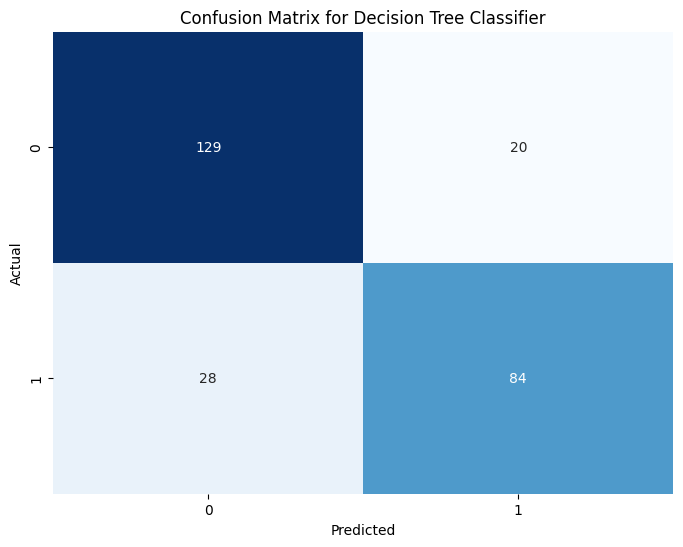

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


# Le = LabelEncoder()
# df['gender_le'] = Le.fit_transform(df['gender'].astype('str'))

category_data = ['pclass', 'embarked', 'gender']
numeric_data = ['age', 'family', 'fare']
#encode categorical data and scale numeric data using columntransformer
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), category_data),
                                               ('num', StandardScaler(), numeric_data)],
                                               remainder='drop')
#selects our x and y features
X = df.drop(['survived', 'survived_le', 'Name', 'gender_le', 'date'], axis = 1)
y = df['survived']

#split features into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#preprocess the split data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

model_clf = DecisionTreeClassifier()
#list the prameters
params = [
    {'max_depth': [None, 3, 5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1,2,3]}
]

#initialize the gridsearchcv
grid_search = GridSearchCV(model_clf, params, cv = 3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)
best_estimators = grid_search.best_estimator_

y_pred_dt = best_estimators.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred_dt))

#plot confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

Decision Tree Cassifier is better than the logistic regression model. 


## Random Forest model

RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=50)
Random Forest Accuracy: 0.8276
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       149
           1       0.84      0.74      0.79       112

    accuracy                           0.83       261
   macro avg       0.83      0.82      0.82       261
weighted avg       0.83      0.83      0.83       261



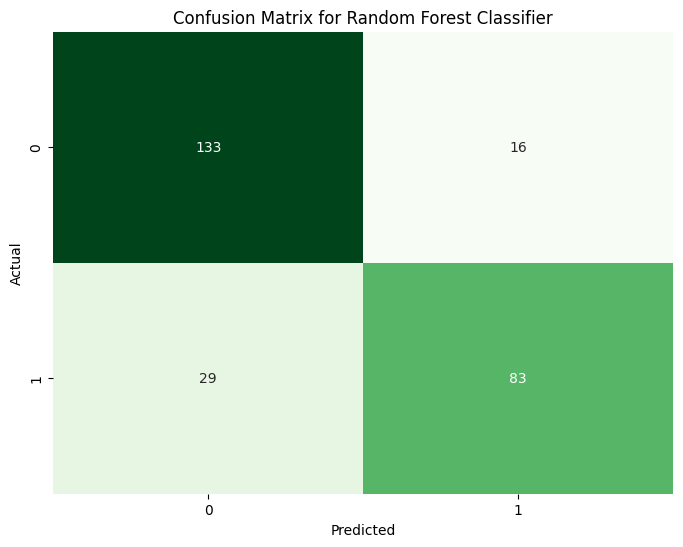

In [107]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
param_grid = [
    {'n_estimators': [30,50, 500], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 3]}
]
grid_search_rf = GridSearchCV(rf_clf, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print(best_rf)
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')
print(classification_report(y_test, y_pred_rf))
#plot confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()